Mean squared error is: 21026037.329511296


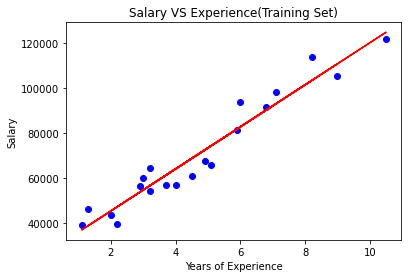

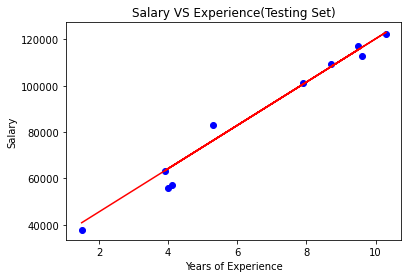

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets
 
dataset = pd.read_csv('Salary_Data.csv')
X= dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3,random_state = 0)

# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set result ￼

y_pred = regressor.predict(X_test)

#Calculate the mean_squared error
from sklearn.metrics import mean_squared_error 
print("Mean squared error is:",mean_squared_error(y_test,y_pred))

#visualize training set results

plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('Salary VS Experience(Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#visualize testing set results

plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,regressor.predict(X_test),color='red')
plt.title('Salary VS Experience(Testing Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


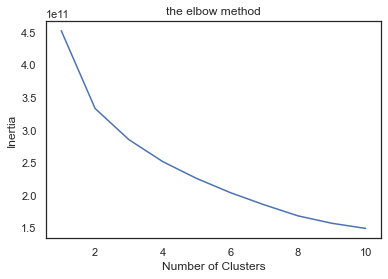

silhouette score is: 0.4272072267584384


In [68]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# Importing the datasets
 
cluster_data=pd.read_csv("K-Mean_Dataset.csv")
cluster_data.head()

from sklearn.model_selection import train_test_split
X = cluster_data.iloc[:, [1,2,3,4]].values
Y = cluster_data.iloc[:, -1].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cluster_data['CUST_ID'] = le.fit_transform(cluster_data.CUST_ID.values)
X_new=cluster_data.fillna(cluster_data.mean())

X_new=cluster_data.fillna(cluster_data.mean())


#Using the elbow method to find out the optimal number of #clusters. KMeans class from the sklearn library.
from sklearn.cluster import KMeans
wcss = []
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_new)
    wcss.append(kmeans.inertia_)
wcss

#4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#5 According to the Elbow graph we deterrmine the clusters number.
from sklearn.cluster import KMeans
nclusters = 2 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_new)

# predict the cluster for each data point.
y_cluster_kmeans = km.predict(X_new)

#Calculate the silhouette score for the above clustering
from sklearn import metrics
score = metrics.silhouette_score(X_new, y_cluster_kmeans)
print("silhouette score is:",score)


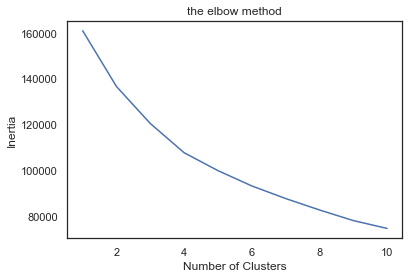

silhouette score 0.17726813468499764


In [72]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_new)
X_scaled_array = scaler.transform(X_new)
X_scaled = pd.DataFrame(X_scaled_array, columns = X_new.columns)
from sklearn.cluster import KMeans
wcs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcs.append(kmeans.inertia_)
wcs
#4.Plot the elbow graph
plt.plot(range(1,11),wcs)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)
KMeans(n_clusters=4)
y_cluster_kmeans = km.predict(X_scaled)
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("silhouette score",score)